In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#warning
import warnings
warnings.filterwarnings('ignore')

#***LOad the dataset:-***

In [16]:
df=pd.read_csv('/content/Dataset_Generator_for_DTDC.csv')

In [17]:
df.head()

,Origin,Destination,Pouch No,Date,Sender's Name,Sender Phone,Sender Address,Sender City,Sender State,Sender Pincode,...,Company Stamp,Receiver Signature,Receive Date,Tariff,VAS Charges,Total Amount,Mode,Risk Surcharge,Mode of Payment,Nature of Consignment
0,Nagpur,Jamshedpur,55e275ad-8da9-49c9-986c-93134fef2c19,2025-06-25,Megha Majumdar,6137840452,"H.No. 425 Varughese Chowk, Above Shop, Nagpur,...",Nagpur,Maharashtra,264582,...,NaN,NaN,2025-06-30,147.22,70.09,217.31,Express,Carrier,Cash,Dox
1,Jaipur,Vizag,7fab4175-11b2-4090-a0ed-4571ccd68878,2025-06-27,Nanda-Saraf,52907142,"48/880, Tripathi, Above Shop, Jaipur, Rajastha...",Jaipur,Rajasthan,200155,...,NaN,NaN,2025-06-28,256.83,82.20,339.03,Surface,Carrier,Card,Dox
2,Lucknow,Bhubaneswar,5231428d-b524-433e-8043-45c7e39a94aa,2025-06-27,Contractor LLC,5081512738,"257, Kulkarni Path, Above Shop, Lucknow, Uttar...",Lucknow,Uttar Pradesh,353311,...,NaN,NaN,2025-06-28,432.45,107.63,540.08,Surface,Carrier,Cash,Non-Dox
3,Coimbatore,Mumbai,2f556b38-298d-4e8c-9310-4e6a3a5fbe61,2025-06-11,Krishna Hans,1518559754,"83/17 Sridhar Zila, Above Shop, Coimbatore, Ta...",Coimbatore,Tamil Nadu,553663,...,NaN,NaN,2025-06-15,1162.00,25.23,1187.23,Express,Carrier,Card,Non-Dox
4,Meerut,Vijayawada,c3154041-34eb-435e-94d8-0900e6a9ed01,2025-07-01,Kuruvilla-Tiwari,1666398391,"16/64 Jayaraman Circle, Above Shop, Meerut, Ut...",Meerut,Uttar Pradesh,273143,...,NaN,NaN,2025-07-05,285.55,67.70,353.25,Surface,Carrier,Cash,Dox


In [18]:
#shape
df.shape

(49639, 42)

#***EDA(Explotary Data Analysis):-***

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49639 entries, 0 to 49638
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Origin                 49639 non-null  object 
 1   Destination            49639 non-null  object 
 2   Pouch No               49639 non-null  object 
 3   Date                   49639 non-null  object 
 4   Sender's Name          49639 non-null  object 
 5   Sender Phone           49639 non-null  int64  
 6   Sender Address         49639 non-null  object 
 7   Sender City            49639 non-null  object 
 8   Sender State           49639 non-null  object 
 9   Sender Pincode         49639 non-null  int64  
 10  Sender GSTIN           26778 non-null  object 
 11  Total Pieces           49639 non-null  int64  
 12  Actual Wt              49639 non-null  float64
 13  Volumetric Wt          49639 non-null  float64
 14  Chargeable Wt          49639 non-null  float64
 15  Pa

In [20]:
#check duplicate column
df.duplicated().sum()

np.int64(0)

In [21]:
#check the null values
df.isnull().sum()

,0
Origin,0
Destination,0
Pouch No,0
Date,0
Sender's Name,0
Sender Phone,0
Sender Address,0
Sender City,0
Sender State,0
Sender Pincode,0


In [22]:
#drop the null values columns
df = df.dropna(axis=1)

In [23]:
df.columns

Index(['Origin', 'Destination', 'Pouch No', 'Date', 'Sender's Name',
       'Sender Phone', 'Sender Address', 'Sender City', 'Sender State',
       'Sender Pincode', 'Total Pieces', 'Actual Wt', 'Volumetric Wt',
       'Chargeable Wt', 'Paperwork', 'Sender Date', 'Recipient Name',
       'Recipient Phone', 'Recipient Address', 'Recipient City',
       'Receiver State', 'Receiver Pincode', 'Description', 'Consignment No',
       'Expiry Date', 'Booking Code', 'Receiver Name', 'Relationship',
       'Receive Date', 'Tariff', 'VAS Charges', 'Total Amount', 'Mode',
       'Risk Surcharge', 'Mode of Payment', 'Nature of Consignment'],
      dtype='object')

In [24]:
# Drop columns with too many nulls or irrelevant info (like signatures, stamps, GSTINs)
df = df.drop([
    'Pouch No', 'Sender\'s Name', 'Sender Phone', 'Sender Address','Date',
    'Recipient Name', 'Recipient Phone', 'Recipient Address',
    'Consignment No', 'Booking Code', 'Receiver Name',
    'Sender Date', 'Receive Date', 'Expiry Date', 'Relationship'
], axis=1)


In [25]:
#shape of dataset
df.shape

(49639, 21)

In [26]:
df['Mode'].value_counts()

,count
Mode,
Surface,29699
Express,9994
Air Cargo,9946


#***Data Visualization:-***

<Figure size 1200x600 with 0 Axes>

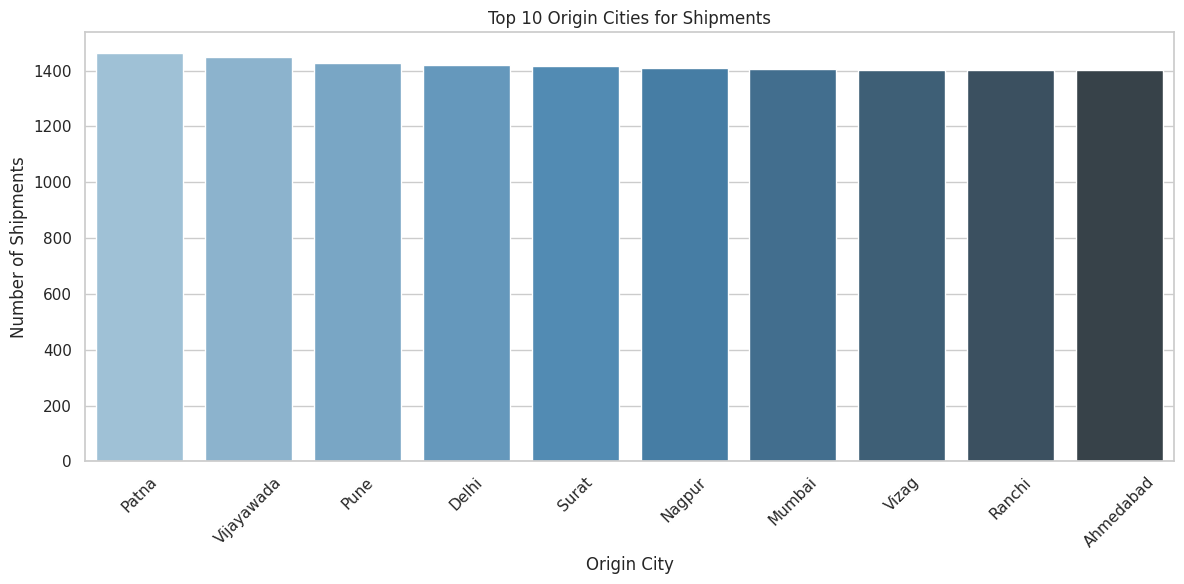

In [27]:
# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# -----------------------------
# 1. Shipments by Origin City
# -----------------------------
plt.figure(figsize=(12, 6))
top_origins = df['Origin'].value_counts().head(10)
sns.barplot(x=top_origins.index, y=top_origins.values, palette='Blues_d')
plt.title("Top 10 Origin Cities for Shipments")
plt.xlabel("Origin City")
plt.ylabel("Number of Shipments")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

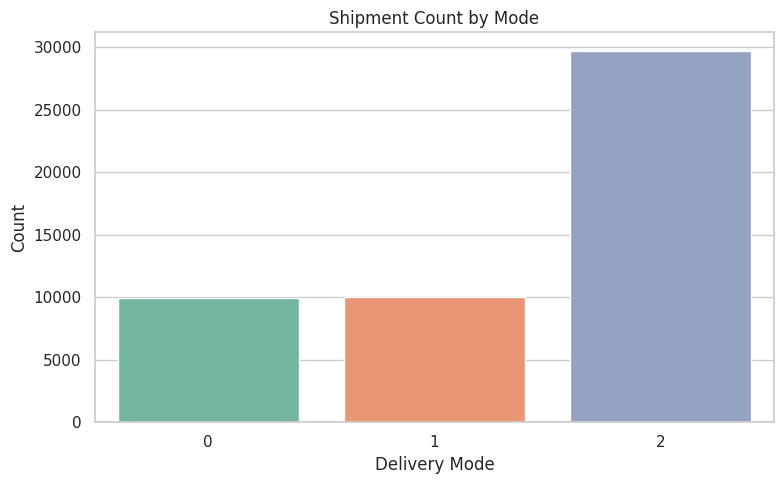

In [30]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Mode', palette='Set2')
plt.title("Shipment Count by Mode")
plt.xlabel("Delivery Mode")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

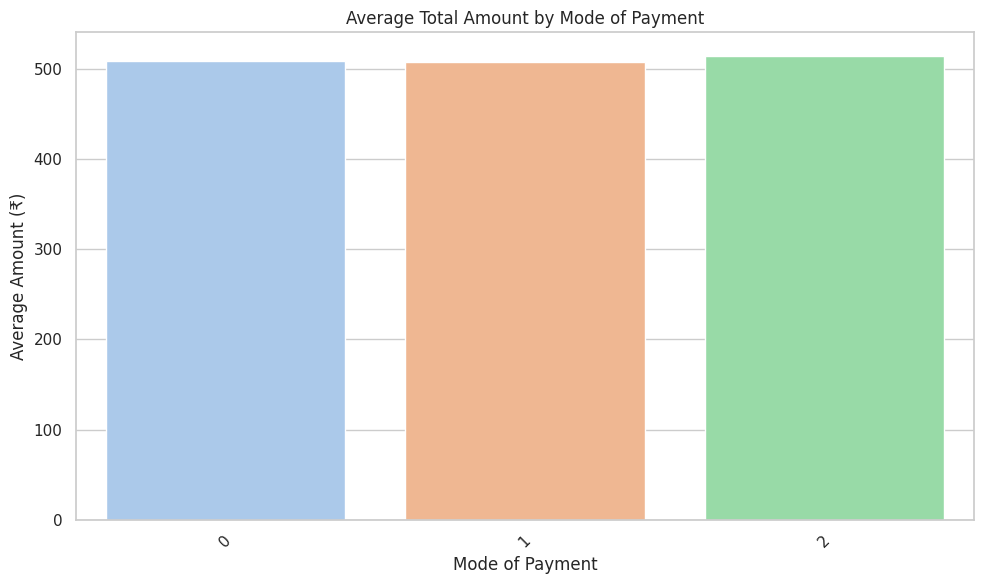

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Mode of Payment', y='Total Amount', estimator='mean', ci=None, palette='pastel')
plt.title("Average Total Amount by Mode of Payment")
plt.xlabel("Mode of Payment")
plt.ylabel("Average Amount (₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#***Label Encoding:-***

In [28]:
# Encode all categorical columns using LabelEncoder
label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

#***Spliing the Dataset:-***

In [29]:
target = 'Mode'

# Features and label
X = df.drop(columns=[target])
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [35]:
# Train and evaluate models
print("Model Accuracies (%):")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    print(f"{name}: {accuracy:.2f}%")

Model Accuracies (%):
Logistic Regression: 65.58%
Decision Tree: 99.67%
Random Forest: 99.18%
Naive Bayes: 66.91%
Support Vector Machine: 59.72%
K-Nearest Neighbors: 47.56%


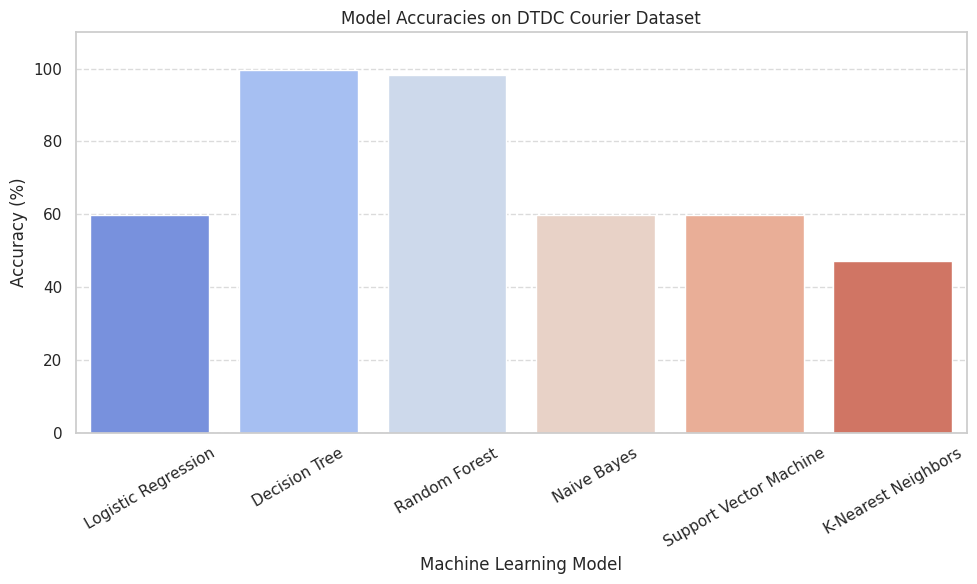

In [36]:
# Accuracy data (as provided)
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest',
               'Naive Bayes', 'Support Vector Machine', 'K-Nearest Neighbors']
accuracies = [59.72, 99.63, 98.40, 59.72, 59.72, 47.27]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='coolwarm')
plt.title('Model Accuracies on DTDC Courier Dataset')
plt.xlabel('Machine Learning Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 110)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()